<a href="https://colab.research.google.com/github/DhawalaRajakaruna/ML-Practise/blob/main/FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#install the required libraries here
!pip install fiftyone
!pip install ultralytics

  Using cached fiftyone-1.3.0-py3-none-any.whl.metadata (24 kB)
  Using cached aiofiles-24.1.0-py3-none-any.whl.metadata (10 kB)
  Using cached argcomplete-3.5.3-py3-none-any.whl.metadata (16 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


image 1/1 /content/001.jpg: 480x640 5 persons, 46.1ms
Speed: 15.8ms preprocess, 46.1ms inference, 338.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


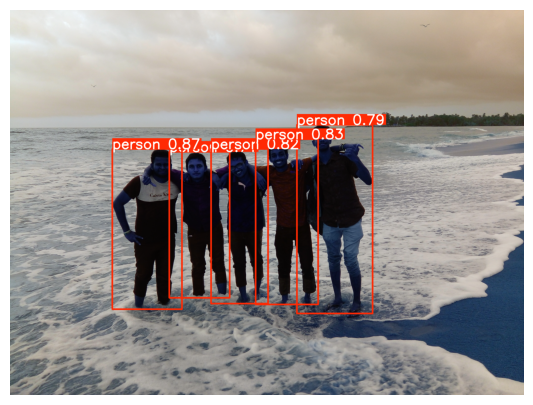

In [7]:
# My first object detection code using pretraiend model wityh YOLO

from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as img

# Load a YOLO model
model = YOLO("yolo11n.pt")

# Perform object detection
results = model(source="001.jpg", conf=0.4, save=True)

for results in results:
    anotatedImage = results.plot()

    plt.figure(figsize=(8,5))
    plt.imshow(anotatedImage)
    plt.axis('off')
    plt.show()

In [8]:
#Form hrer onwards I went throuh a blog post and start downloading the data set I want to train my own model
#Still noob
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!git clone https://github.com/NanoCode012/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format.git

Cloning into 'OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format'...
remote: Enumerating objects: 548, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 548 (delta 2), reused 5 (delta 2), pack-reused 542 (from 1)
Receiving objects: 100% (548/548), 34.16 MiB | 18.92 MiB/s, done.
Resolving deltas: 100% (218/218), done.


In [10]:
!pip3 install -r /content/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 43.9 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.21.2
    Uninstalling docutils-0.21.2:
      Successfully uninstalled docutils-0.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 8.1.3 requires docutils<0.22,>=0.20, but you have docutils 0.16 which is incompatible.


In [11]:
# These code make the directories which needs to maintain to put training data
!mkdir OID
!mkdir OID/Dataset

In [12]:
classes = 'Apple'
samples = 100

!python /content/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format/main.py downloader --classes {classes} --type_csv train --limit {samples}

    [INFO] |  saving dataset configurations at ./OID/Dataset/config.json

		   ___   _____  ______            _    _       _    _  
		 .'   `.|_   _||_   _ `.         | |  | |     | |  | |    
		/  .-.  \ | |    | | `. \ _   __ | |__| |_    |  | | |   
		| |   | | | |    | |  | |[ \ [  ]|____   _|     | | | 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_       | |
		 `.___.'|_____||______.'   \__/     |_____|     |_|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Apple.
   [ERROR] | Missing the class-descriptions-boxable.

In [13]:
# Create the dataset YAML file in Colab
yaml_content = """
train: /content/OID/Dataset/train/Apple/images
val: /content/OID/Dataset/val/Apple/images

nc: 1  # Number of classes
names: ['Apple']  # Class names
"""

# Save the YAML content to a file
with open('/content/apple.yaml', 'w') as f:
    f.write(yaml_content)

print("YAML file created successfully!")


YAML file created successfully!


In [14]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set up paths
img_dir = '/content/OID/Dataset/train/Apple/images'
label_dir = '/content/OID/Dataset/train/Apple/labels'
val_img_dir = '/content/OID/Dataset/val/Apple/images'
val_label_dir = '/content/OID/Dataset/val/Apple/labels'

# Create the val directories if they don't exist
os.makedirs(val_img_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)

# Get all the image file names
image_files = os.listdir(img_dir)

# Split the images into training and validation sets (80/20 split)
train_files, val_files = train_test_split(image_files, test_size=0.2, random_state=42)

# Move the validation files to the val directories
for file in val_files:
    # Move image files
    shutil.move(os.path.join(img_dir, file), os.path.join(val_img_dir, file))
    # Move corresponding label files
    label_file = file.replace('.jpg', '.txt')  # Assuming labels are in .txt format
    shutil.move(os.path.join(label_dir, label_file), os.path.join(val_label_dir, label_file))

print(f"Moved {len(val_files)} files to validation set.")


Moved 20 files to validation set.


In [17]:
!sudo apt-get install pyqt5-dev-tools
!pip install labelImg
!labelImg


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libevdev2 libgudev-1.0-0 libinput-bin libinput10 libmd4c0 libmtdev1
  libqt5core5a libqt5dbus5 libqt5designer5 libqt5gui5 libqt5help5
  libqt5network5 libqt5printsupport5 libqt5sql5 libqt5sql5-sqlite libqt5svg5
  libqt5test5 libqt5widgets5 libqt5xml5 libwacom-bin libwacom-common libwacom9
  libxcb-icccm4 libxcb-image0 libxcb-keysyms1 libxcb-render-util0 libxcb-util1
  libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1 libxkbcommon-x11-0 python3-pyqt5
  python3-pyqt5.sip qt5-gtk-platformtheme qttranslations5-l10n
Suggested packages:
  qt5-image-formats-plugins qtwayland5
The following NEW packages will be installed:
  libevdev2 libgudev-1.0-0 libinput-bin libinput10 libmd4c0 libmtdev1
  libqt5core5a libqt5dbus5 libqt5designer5 libqt5gui5 libqt5help5
  libqt5network5 libqt5printsupport5 libqt5sql5 libqt5sql5-sqlite libqt5svg5
  libqt5test5 libqt

In [16]:
# Step 2: Import YOLO from Ultralytics
from ultralytics import YOLO

# Step 3: Verify GPU Availability
import torch
if torch.cuda.is_available():
    print("✅ GPU is available. Training will be faster!")
else:
    print("⚠️ No GPU detected. Please enable GPU in Colab Runtime settings.")

# Step 4: Load the Pretrained YOLO Model
model = YOLO("yolo11n.pt")  # Load a pretrained YOLO model

# Step 5: Train the Model
results = model.train(
    data="apple.yaml",   # Path to your dataset configuration file
    epochs=75,          # Number of training epochs
    imgsz=640,           # Image size for training
    batch=16,            # Adjust batch size based on GPU memory
    device=0             # Use GPU (0 refers to the first GPU)
)


✅ GPU is available. Training will be faster!
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=apple.yaml, epochs=75, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

train: Scanning /content/OID/Dataset/train/Apple/labels.cache... 80 images, 0 backgrounds, 80 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/OID/Dataset/train/Apple/images/006041901fa2e7b4.jpg: ignoring corrupt image/label: could not convert string to float: 'Apple'
train: WARNING ⚠️ /content/OID/Dataset/train/Apple/images/006ac0b3d61f1ee9.jpg: ignoring corrupt image/label: could not convert string to float: 'Apple'
train: WARNING ⚠️ /content/OID/Dataset/train/Apple/images/007a0bec00a90a66.jpg: ignoring corrupt image/label: could not convert string to float: 'Apple'
train: WARNING ⚠️ /content/OID/Dataset/train/Apple/images/00db614fcd5d77ea.jpg: ignoring corrupt image/label: could not convert string to float: 'Apple'
train: WARNING ⚠️ /content/OID/Dataset/train/Apple/images/02c5352d0e273256.jpg: ignoring corrupt image/label: could not convert string to float: 'Apple'
train: WARNING ⚠️ /content/OID/Dataset/train/Apple/images/04007926c681c4f4.jpg: ignoring corrupt image/label: could not convert string to float: 'Apple'
train: WARNING ⚠️ /content/OID/Dataset/train/Apple/images/0a4827f20c8aef05.jpg: ig

ValueError: not enough values to unpack (expected 3, got 0)